In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')


![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)

![](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banner_Top_06.06.18.jpg?raw=true)

# The Unfair Dice Problem

## Setting up the game

We will use two dice in this game, and assume the dice are fair, i.e. there is the same probability of getting one of the six faces. 

Let's suppose two people, Alice and Bob, decide to play with this setup and start with the same amount of money, $10 each. 

One die will be designated as "Alice's die" while the other one will be designated as "Bob's die". Dice are rolled and the outcome obtained from Bob's outcome is subtracted from the Alice's outcome. 

<img src="twodice6401.jpg" alt="Drawing" style="width: 450px;"/>

If Alice's outcome is greater than or equal to Bob's, Alice takes $\$1$ from Bob. Otherwise, Bob takes $\$1$ from Alice. 

## Let's Play

Forming groups of two's, decide which of you plays "Alice" and "Bob". 

Click the "Roll the dice" button below to roll the dice, see who wins. Repeat ten times.

Click the "Reset" button to start again with ten dollars each.

<font color='red'> Ask students if they think the game is fair, and why. 

In [2]:
import random
def roll_dice_two_players():
    major_die = random.choice([1,2,3,4,5,6])
    minor_die = random.choice([1,2,3,4,5,6])
    
    print("Alice rolls ",major_die, "and Bob rolls", minor_die,".")
    return (major_die >= minor_die)


In [3]:
from ipywidgets import widgets,Layout,Button,VBox,HBox
from IPython.display import display, Javascript, Markdown, HTML, clear_output
import pandas as pd

## We store the game results in a data frame, for convenience

df = pd.DataFrame({"Alice's Points": [ 0 for i in range(11)],
                  "Bob's Points": [ 0 for i in range(11)]},
                  index=[i for i in range(11)])
df.loc[0, "Alice's Points"] = 10
df.loc[0, "Bob's Points"] = 10

## We make a couple of buttons to roll the dice, and reset the game
style = {'description_width': 'initial'}

# Button widget
play_button = widgets.Button(
    button_style='success',
    description="Roll the dice", 
    layout=Layout(width='15%', height='30px'),
    style=style
) 

# Button widget
reset_button = widgets.Button(
    button_style='danger',
    description="Reset the game", 
    layout=Layout(width='15%', height='30px'),
    style=style
) 

turn_n = 0

def play_action(b):
    global turn_n
    clear_output()
    display(tab2)
    turn_n += 1
    if (turn_n>10):
        print("Game over! Who won this round?")
        display(df[0:11])
    else:
        print("Turn #",turn_n)
        if roll_dice_two_players():
            print("Alice wins this roll. She gets one point from Bob.")
            df.loc[turn_n, "Alice's Points"] = df.loc[turn_n-1,"Alice's Points"] +1
            df.loc[turn_n, "Bob's Points"] = df.loc[turn_n-1,"Bob's Points"]-1 
        else:
            print("Bob wins this roll. He gets one point from Alice.")
            df.loc[turn_n, "Alice's Points"] = df.loc[turn_n-1,"Alice's Points"] -1
            df.loc[turn_n, "Bob's Points"] = df.loc[turn_n-1,"Bob's Points"]+1 
        display(df[0:turn_n+1])
  
def reset_action(b):
    global turn_n
    clear_output()
    display(tab2)
    print("Alice and Bob start with ten points each.")
    display(df[0:1])
    turn_n=0
    
    
play_button.on_click( play_action )
reset_button.on_click( reset_action )

tab1 = HBox(children=[play_button,reset_button])
tab2 = widgets.Tab(children=[tab1])
tab2.set_title(0, 'Play')
display(tab2)
print("Alice and Bob start with ten points each.")
display(df[0:1])

# Connect widget to function - run subsequent cells


Alice and Bob start with ten points each.


,Alice's Points,Bob's Points
0,10,10


<h3>Let's Try Again....</h3>

Bob is losing the ties! So let's make things more fair, give him two dollars when he wins.

Try this weighted game instead.  Who wins?

<font color='red'> Ask students if they think the game is fair, and why. 

In [4]:
## re-use the same data frame
df.loc[0, "Alice's Points"] = 10
df.loc[0, "Bob's Points"] = 10

## We make a couple of buttons to roll the dice, and reset the game
style = {'description_width': 'initial'}

# Button widget
play_button2 = widgets.Button(
    button_style='success',
    description="Roll the dice", 
    layout=Layout(width='15%', height='30px'),
    style=style
) 

# Button widget
reset_button2 = widgets.Button(
    button_style='danger',
    description="Reset the game", 
    layout=Layout(width='15%', height='30px'),
    style=style
) 

turn2 = 0

def play_action2(b):
    global turn2
    clear_output()
    display(tab4)
    turn2 += 1
    if (turn2>10):
        print("Game over! Who won this round?")
        display(df[0:11])
    else:
        print("Turn #",turn2)
        if roll_dice_two_players():
            print("Alice wins this roll. She gets one point from Bob.")
            df.loc[turn2, "Alice's Points"] = df.loc[turn2-1,"Alice's Points"] +1
            df.loc[turn2, "Bob's Points"] = df.loc[turn2-1,"Bob's Points"]-1 
        else:
            print("Bob wins this roll. He gets two points from Alice.")
            df.loc[turn2, "Alice's Points"] = df.loc[turn2-1,"Alice's Points"] -2
            df.loc[turn2, "Bob's Points"] = df.loc[turn2-1,"Bob's Points"]+2 
        display(df[0:turn2+1])
  
def reset_action2(b):
    global turn2
    clear_output()
    display(tab4)
    print("Alice and Bob start with ten points each.")
    display(df[0:1])
    turn2=0
    
    
play_button2.on_click( play_action2 )
reset_button2.on_click( reset_action2 )

tab3 = HBox(children=[play_button2,reset_button2])
tab4 = widgets.Tab(children=[tab3])
tab4.set_title(0, 'Play')
display(tab4)
print("Alice and Bob start with ten points each.")
display(df[0:1])


Alice and Bob start with ten points each.


,Alice's Points,Bob's Points
0,10,10


## What makes this game unfair?

Below is the sample space of our game. Bob's die outcome (black column) is subtracted from Alice's die outcome (dark red row). 

Alice wins whenever the result is 0 or more. Bob wins whenever the result is negative. 

<font color='red'> 
    
Ask the students to use the diagram below to determine what the probability each player will win is. 

The probability Alice will win is $$P(A) = \frac{21}{36}$$

while the probability Bob will win is $$P(B) = \frac{15}{36}$$

In [5]:
%%html
<table style='margin: 0 auto;font-size: 25px'>
    <tr style="width:100%;text-align:center;background-color:#990000;color:white">
    <th style="background-color:white;color:white"> </th>
        <th>1</th>
        <th>2</th>
        <th>3</th>
        <th>4</th>
        <th>5</th>
        <th>6</th>
    </tr>
    <tr>
        
        <td style="background-color:black;color:white"><strong>1</strong></td>
        <td style="background-color:#ffcccc">0</td>
        <td style="background-color:#ffcccc">1</td>
        <td style="background-color:#ffcccc">2</td>
        <td style="background-color:#ffcccc">3</td>
        <td style="background-color:#ffcccc">4</td>
        <td style="background-color:#ffcccc">5</td>
    </tr>
    <tr >
        <td style="background-color:black;color:white"><strong>2</strong></td>
        <td>-1</td>
        <td style="background-color:#ffcccc">0</td>
        <td style="background-color:#ffcccc">1</td>
        <td style="background-color:#ffcccc">2</td>
        <td style="background-color:#ffcccc">3</td>
        <td style="background-color:#ffcccc">4</td>
    </tr>
    <tr >
        <td style="background-color:black;color:white"><strong>3</strong></td>
        <td>-2</td>
        <td>-1</td>
        <td style="background-color:#ffcccc">0</td>
        <td style="background-color:#ffcccc">1</td>
        <td style="background-color:#ffcccc">2</td>
        <td style="background-color:#ffcccc">3</td>
    </tr>
    <tr >
        <td style="background-color:black;color:white"><strong>4</strong></td>
        <td>-3</td>
        <td>-2</td>
        <td>-1</td>
        <td style="background-color:#ffcccc">0</td>
        <td style="background-color:#ffcccc">1</td>
        <td style="background-color:#ffcccc">2</td>
    </tr>
    <tr >
        <td style="background-color:black;color:white"><strong>5</strong></td>
        <td>-4</td>
        <td>-3</td>
        <td>-2</td>
        <td>-1</td>
        <td style="background-color:#ffcccc">0</td>
        <td style="background-color:#ffcccc">1</td>
    </tr>
    <tr >
        <td style="background-color:black;color:white"><strong>6</strong></td>
        <td>-5</td>
        <td>-4</td>
        <td>-3</td>
        <td>-2</td>
        <td>-1</td>
        <td style="background-color:#ffcccc">0</td>
    </tr>
</table>

,1,2,3,4,5,6
1,0,1,2,3,4,5
2,-1,0,1,2,3,4
3,-2,-1,0,1,2,3
4,-3,-2,-1,0,1,2
5,-4,-3,-2,-1,0,1
6,-5,-4,-3,-2,-1,0


<font color='red'>
    
Ask the students to use that number to complete the expected per-round payoff for each player. Answers are here.

In the first game, the expected per-round payoff for Alice is $$\big( \frac{21}{36}\big) *1 + \big( \frac{15}{36} \big)*(-1) = \frac{1}{6}.$$    

So after about ___ (6 * number of initial points Alice has) rounds of play, Alice would be "expected" to have all of the candies.  

<font color='red'>

Conversely, in the second game, the expected per-round payoff for Alice is  $$\big( \frac{21}{36}\big) *1 + \big( \frac{15}{36} \big)*(-2) = \frac{-1}{4}.$$  


So after about ___ (4 * number of initial points Bob has) rounds of play, Bob would be "expected" to have all of the candies.

## Computational Thinking: Simulating the Game Using Python and Jupyter Notebooks 

Most teams must note something is off with this game. One player seems to consistently get the other player's toothpicks and win. 

One way to test whether the same player wins consistently is to run several trials and observe how each player fares, how many turns it took and what the outcome was in each trial, however this is time consuming and prone to error. 

Here we benefit from using programming languages to simulate several trials and observe how the players are doing over time, as well as the average number of rounds it takes before a player loses all their toothpicks. 

In [6]:
import random

import matplotlib.patches as mpatches
from ipywidgets import interact, interact_manual, widgets, Layout
from ipywidgets import widgets, VBox, HBox, Button
from IPython.display import display, Javascript, Markdown, HTML
import random
import matplotlib.pyplot as plt

style = {'description_width': 'initial'}

def runN_cell( b ):
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1,IPython.notebook.get_selected_index()+2)'))    

    
def rerun_cell( b ):
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index(),IPython.notebook.get_selected_index()+1)'))    


In [7]:
### This cell contains code to simulate our game

def roll_dice():
    
    """This function simulates rolling two dice 
    and substracting the minor die outcome from the major die outcome"""
    major_die = random.choice([1,2,3,4,5,6])
    minor_die = random.choice([1,2,3,4,5,6])
    
    if major_die - minor_die >= 0:
        return True
    else:
        return False

def play_game(StartValue_A, StartValue_B, p, q):
    
    """This function implements two players engaging in the game"""
        
    # Initialize variables
    # Set value A to starting value, resp value C
    value_A = StartValue_A
    value_B = StartValue_B 
    turn_number = 0
    # Store points on each turn
    CurrentValue_A = []
    CurrentValue_B = []
    # Initialize winners
    winner_A = 0
    winner_B = 0
    
    # We want to continue playing as long as both players have at least one more point
    while value_A > 0 and value_B > 0:
        # Increase turn
        turn_number += 1
        
        # If major die - minor die is greater than or equal to zero
        if roll_dice():
            # Update and save current values for A and B
            CurrentValue_A.append(value_A)
            CurrentValue_B.append(value_B)
            
            # Give A one more (set of) point(s) 
            value_A = value_A + p
            # Remove the same quantity from B 
            value_B = value_B - p
            
        # If major die - minor die is negative
        else:
            # Update and save current values for A and B
            CurrentValue_A.append(value_A)
            CurrentValue_B.append(value_B)
            # Give B one more (set of) points 
            value_B = value_B + q
            # Remove the same quantity from A
            value_A = value_A - q
            
    # Get winners
    # If A has zero or less points, B is the winner
    if value_A <= 0: winner_B = 1
    # Otherwise, A is the winner 
    if value_B <= 0: winner_A = 1
    
    return [turn_number, winner_A, winner_B,CurrentValue_A,CurrentValue_B]
    
    

def plot_game(StartValue_A, StartValue_B, p, q):
    
    """This function simulates the game for a given 1000 trials and prints 
    the average number of times A and B win"""
    # Suppose we set 1000 trials
    n = 1000
   
    # Initialize variables
    wins_for_A = 0
    wins_for_B = 0
    total_moves = 0   
    
    # Iterate over the total number of trials, and repeat game
    for i in range(n):  
        [turn_number, winner_A, winner_B,CurrentValue_A,CurrentValue_B] = play_game(StartValue_A, StartValue_B, p, q)
        # Add number of turns
        total_moves += turn_number
        # Add total number of times A won
        wins_for_A += winner_A
        # Add total number of times B won  
        wins_for_B += winner_B
    
    print("The average number of rounds is", total_moves/n)
    print("Player Alice wins", round(100*wins_for_A/n,2), "% of the time")
    print("Player Bob wins", round(100*wins_for_B/n,2), "% of the time")
    
    # Plot results
    # Set x axis values
    x_co = [i for i in range(len(CurrentValue_A))]
    # Initialize figure and set x, y limits
    fig,ax = plt.subplots(figsize=(10,10))
    ax.set_xlim([0,len(x_co) + 1])
    ax.set_ylim([0,2*max([StartValue_A,StartValue_B])])
    ax.grid(True) 
    # Plot points for A and B at each turn
    ax.plot(x_co,CurrentValue_A,label="Alice",c='r')
    ax.plot(x_co,CurrentValue_B,label="Bob",c='black')
    # Add labels, title and legend to improve readability
    ax.set_ylabel("Number of points",fontsize=25)
    ax.set_xlabel("Number of turns",fontsize=25)
    ax.set_title("Game Simulation",fontsize=25)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=1.)
    plt.show()

In [8]:
# Create interactive menu with parameters
all_the_widgets = [widgets.BoundedIntText(
            value=10,
            min=1,
            max=1000,
            description='Group A Initial Points:',
            disabled=False,style =style), widgets.BoundedIntText(
            value=10,
            min=1,
            max=1000,
            description='Group B Initial Points:',
            disabled=False,style =style), widgets.BoundedFloatText(
            value=1,
            min=0,
            max=1000,
            step=0.1,
            description='# points A gets if A wins',
            disabled=False,
            continuous_update=False,
            orientation='horizontal',
            readout=True,
            readout_format='f',
            style =style),widgets.BoundedFloatText(
            value=1,
            min=0,
            max=1000,
            step=0.1,
            description='# points B gets if B wins',
            disabled=False,
            continuous_update=False,
            orientation='horizontal',
            readout=True,
            readout_format='f',
            style =style)]


# Button widget
CD_button = widgets.Button(
    button_style='success',
    description="Run Simulations", 
    layout=Layout(width='15%', height='30px'),
    style=style
)    

# Connect widget to function - run subsequent cells
CD_button.on_click( runN_cell )

# user menu using categories found above
tab3 = VBox(children=[HBox(children=all_the_widgets[0:2]),HBox(children=all_the_widgets[2:4]),
                      CD_button])
tab = widgets.Tab(children=[tab3])
tab.set_title(0, 'Choose Parameters')
display(tab)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The average number of rounds is 66.487
Player Alice wins 82.1 % of the time
Player Bob wins 17.9 % of the time


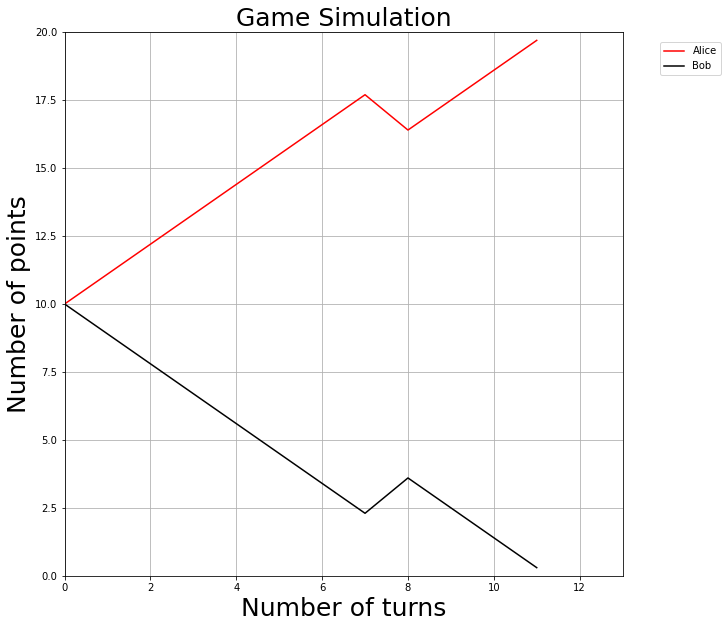

In [13]:
StartValue_A = all_the_widgets[0].value
StartValue_B = all_the_widgets[1].value
p = all_the_widgets[2].value
q = all_the_widgets[3].value
plot_game(StartValue_A, StartValue_B, p, q)

<font color='red'>

Students can play with the simulation to find a solution, i.e. number of initial points for each player, and number of points each player gets when they win, to find a game in which each player wins close to 50% of the time. Solutions will get close to 50%-50%, but might not necessarily be exact. 
    
Examples of solutions that students have found:
    
|Initial Points A|Initial Points B| Points A gets if A wins| Points B gets if B wins|
|-|-|-|-|
|100|100|5 (or 10, 15, 20, 25,...)|7 (resp 14, 21, 28, 35,...)|
|10*|10*|1 (or 2,3,4,5,...)|1.4 (resp 2.8, 4.2, 5.6, 7,...)|
    
*Number of initial points might need to change.
    
If we go back to the expected per-round payoff for Alice, and insert 5 and 7, we see
    $$\big( \frac{21}{36}\big) *5 + \big( \frac{15}{36} \big)*(-7) = \frac{0}{6} = 0.$$    
   
 The game is fair whenever this equation is equal to zero.

<font color='red'>

    
Discuss with your class what you learned.  
    
For example: 
    
$\bullet$ In this notebook we learned about how slight advantages can significantly change the outcome of two or more people involved and that sometimes this effect is noticeable only after engaging in several iterations. 

$\bullet$ If the players are unaware of the situation, the outcome is the party with greater advantage experiences a higher likelihood of "winning" (or experiencing some positive outome), whereas the party with less advantage experiences lower likelihood of "winning" and thus has a higher probability of experiencing loss. 

$\bullet$ There are significant implications the "losing party" experiences with respect to the quality of their experience, desire to continue engaging, emotional distress, tangible loss, and desire to disengage from the activity. 

$\bullet$ The "winning" party on the other hand, might believe that the outcome is solely due to their work ethic, talent, and might attritbute their success to themselves. The winning party may also attribute outcomes of the losing party accordingly, i.e. they may make them responsible for their loss, instead of acknowledging that the situation is designed to support one member more than the other. 

<font color='red'>

$\bullet$ What can be done? 
    
    
1. Acknowledge that there are many situations in life setup to increase the odds of succeeding more for some than others. Knowing the presence of advantage can be difficult to digest for both parties, however it is a constructive exercise and a wonderful opportunity for improvement. 

2. For parties who have higher likelihood of benefiting from the situation, acknowledge the role of advantage and be open to learning more about what can be done to balance things. 

3. For parties who have lower likelihood of benefiting from the situation, it can be a deeply empowering experience to see the situation as it is and ask yourself what can be done with this knowledge. 

4. Work together to improve the situation, either by adjusting the "payoff" each party receives or by adjusting the initial number of points. In this game, the "winning strategy" for both parties is to adjust the payoff amount each gets. 


<font color='red'>
    
Student exercise. Invite the students to discuss with their parter situations where unfairness plays a role in the outcome each person experiences. Invite the students to think about what can be done to improve the situation and share with the class what they discussed. 
 
    
 <font color='black'>
     
## Apply to real life

1. Think about other examples where unfairness plays a role in the outcome engaged parties experience. 

2. Share an example that came to mind with the class. 
3. Think about what can be done to improve the outcome engaged parties experience. 

![Callysto.ca License](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)